<a href="https://colab.research.google.com/github/Larr014/DataMining/blob/master/EjemploRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [59]:
df = pd.read_csv('/content/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [60]:
df =df.drop(['PassengerId','Name','SibSp','Parch',"Ticket","Fare","Cabin","Embarked"],axis=1)
df

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
886,0,2,male,27.0
887,1,1,female,19.0
888,0,3,female,NaN
889,1,1,male,26.0


In [61]:
df['Sex']  = [1 if x=="female" else 0 for x in df['Sex']]
df['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [62]:
df = df.dropna()
df

,Survived,Pclass,Sex,Age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0
...,...,...,...,...
885,0,3,1,39.0
886,0,2,0,27.0
887,1,1,1,19.0
889,1,1,0,26.0


In [63]:
X = df.copy()
X = X.drop(['Survived'], axis=1)
X

,Pclass,Sex,Age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0
...,...,...,...
885,3,1,39.0
886,2,0,27.0
887,1,1,19.0
889,1,0,26.0


In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['Survived'],
                                                    test_size=0.2, random_state=6#42
                                                    )

In [65]:
X_train

,Pclass,Sex,Age
833,3,0,23.0
218,1,1,32.0
272,2,1,41.0
537,1,1,30.0
314,2,0,43.0
...,...,...,...
271,3,0,25.0
278,3,0,7.0
338,3,0,45.0
600,2,1,24.0


In [66]:
X_test

,Pclass,Sex,Age
526,2,1,50.0
427,2,1,19.0
635,2,1,28.0
726,2,1,30.0
145,2,0,19.0
...,...,...,...
624,3,0,21.0
747,2,1,30.0
150,2,0,51.0
421,3,0,21.0


In [67]:
y_train

833    0
218    1
272    1
537    1
314    0
      ..
271    1
278    0
338    1
600    1
442    0
Name: Survived, Length: 571, dtype: int64

In [68]:
y_test

526    1
427    1
635    1
726    1
145    0
      ..
624    0
747    1
150    0
421    0
704    0
Name: Survived, Length: 143, dtype: int64

Se implementa el algoritmo

Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


acc: 0.8041958041958042
precision: 0.8041346973572038
recall: 0.7879338175948345
f1: 0.8041958041958042


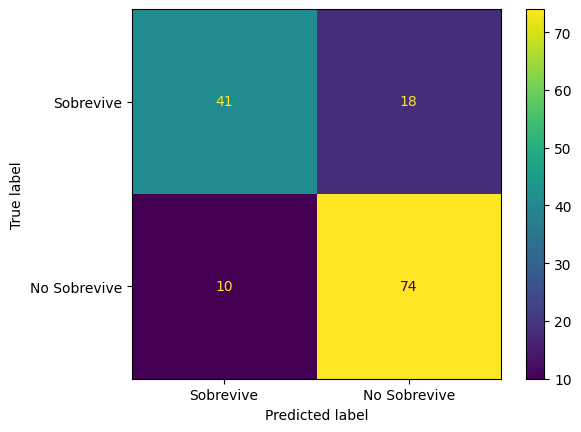

In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion = multilabel_confusion_matrix(y_test,y_pred)
print(f"acc: {accuracy_score(y_test,y_pred)}")
print(f"precision: {precision_score(y_test,y_pred,average='macro')}")
print(f"recall: {recall_score(y_test,y_pred,average='macro')}")
print(f"f1: {f1_score(y_test,y_pred,average='micro')}")
confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['Sobrevive','No Sobrevive']).plot(values_format='d')
